In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from sklearn.manifold import TSNE


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# root = '/content/drive/My Drive/'
root = '.'
# dirData = root + 'large_resolution/'
newDir = root + 'large_nf_InvertZY2/'
pictureDir = root + 'large_aggl_new_not_filtered_part/'
# pictureDir = root + 'large_agglomerative_pca_params/'
if not os.path.exists(pictureDir):
    os.makedirs(pictureDir)

cntps = 3

In [0]:
types = [(link, dist)
         for link in  ['average', 'complete', 'single']
         for  dist in ['euclidean', 'manhattan', 'cosine']]
types.append(('ward', 'euclidean'))
print(types)

[('average', 'euclidean'), ('average', 'manhattan'), ('average', 'cosine'), ('complete', 'euclidean'), ('complete', 'manhattan'), ('complete', 'cosine'), ('single', 'euclidean'), ('single', 'manhattan'), ('single', 'cosine'), ('ward', 'euclidean')]


In [0]:
types = []
types.append(('ward', 'euclidean'))
print(types)

[('ward', 'euclidean')]


In [0]:
def gen_snz():
	nset = 'large_set1'
	wData = np.genfromtxt(os.path.join('.', dirData, (nset + '_W' + '.dat')))
	jData = np.genfromtxt(os.path.join('.', dirData, (nset + '_J' + '.dat')))	
	cntwj = wData.size
	print (cntwj)
 
	iData = []
	rData = []
	for i in range(1, cntps + 1):
		iData.append(np.genfromtxt(os.path.join('.', dirData, (nset + '_Ipsi_' + str(i) + 'ps' + '.txt'))))
		rData.append(np.genfromtxt(os.path.join('.', dirData, (nset + '_Rpsi_' + str(i) + 'ps' + '.txt'))))

	for i in range(cntps):
		iData[i] = np.array(iData[i]).transpose().tolist()
		rData[i] = np.array(rData[i]).transpose().tolist()
	print(np.array(iData).shape)

	for nps in range(cntps):
		zps = []
		xps = []
		yps = []
		for i in range(cntwj):
			ssnz = []
			ssnx = []
			ssny = []
			for k in range(0, 128, 2):
				fiPlus = (iData[nps][i][k] ** 2 + rData[nps][i][k] ** 2) ** 0.5
				fiMinus = (iData[nps][i][k + 1] ** 2 + rData[nps][i][k + 1] ** 2) ** 0.5
				snzi = (fiPlus ** 2 - fiMinus ** 2) / (fiPlus ** 2 + fiMinus ** 2)
				ssnz.append(snzi)
				snzi = (-2 * (rData[nps][i][k + 1] * iData[nps][i][k] -  iData[nps][i][k + 1] * rData[nps][i][k])) / (fiPlus ** 2 + fiMinus ** 2)
				ssny.append(snzi)
				snzi = (2 * (iData[nps][i][k + 1] * iData[nps][i][k] +  rData[nps][i][k + 1] * rData[nps][i][k])) / (fiPlus ** 2 + fiMinus ** 2)
				ssnx.append(snzi)
			if (ssnz[0] < 0):
				ssnz = list(- np.array(ssnz))
				ssny = list(- np.array(ssny))
			zps.append(ssnz)
			xps.append(ssnx)
			yps.append(ssny)
		np.savetxt (newDir + nset + '_Zpsi_' + str (nps + 1) + 'ps.dat', np.array(zps))
		np.savetxt (newDir + nset + '_Ypsi_' + str (nps + 1) + 'ps.dat', np.array(yps))
		np.savetxt (newDir + nset + '_Xpsi_' + str (nps + 1) + 'ps.dat', np.array(xps))
	 
	# np.savetxt (newDir + nset + '_J.dat', np.array(jData))
	# np.savetxt (newDir + nset + '_W.dat', np.array(wData))
# gen_snz()

In [0]:
nset = 'large_set1'
wData = np.genfromtxt(newDir + nset + '_W.dat')
jData = np.genfromtxt(newDir + nset + '_J.dat')
zData = np.genfromtxt(newDir + nset + '_Z.dat')
xData = np.genfromtxt(newDir + nset + '_X.dat')
yData = np.genfromtxt(newDir + nset + '_Y.dat')

cntwj = len(wData)


def read_data(minj, maxj, minw, maxw):
  resind = []
  for i in range (cntwj):
    if ((minw < wData[i] < maxw) and (minj < jData[i] < maxj)):
      resind.append(i)
  return(np.array(resind))


# jmin, jmax, wmin, wmax = 0, 1, 0, 1
# ind = read_data(jmin, jmax, wmin, wmax)
# print(ind)
# name = "j=" + str(jmin) + "-" + str(jmax) + "_w=" + str(wmin) + "-" + str(wmax) + "_"
# print(name)
# print(len(ind))
  

In [0]:
jmin, jmax, wmin, wmax = 0, 0.5, 1.5, 4
ind = read_data(jmin, jmax, wmin, wmax)
wData1 = wData[ind]
jData1 = jData[ind]
snz10 = zData[ind]
snx10 = xData[ind]
sny10 = yData[ind]

cntwj1 = len(wData1)


In [0]:
print(jData1[:81])

[0.024 0.03  0.036 0.042 0.048 0.054 0.06  0.066 0.072 0.078 0.084 0.09
 0.096 0.102 0.108 0.114 0.12  0.126 0.132 0.138 0.144 0.15  0.156 0.162
 0.168 0.174 0.18  0.186 0.192 0.198 0.204 0.21  0.216 0.222 0.228 0.234
 0.24  0.246 0.252 0.258 0.264 0.27  0.276 0.282 0.288 0.294 0.3   0.306
 0.312 0.318 0.324 0.33  0.336 0.342 0.348 0.354 0.36  0.366 0.372 0.378
 0.384 0.39  0.396 0.402 0.408 0.414 0.42  0.426 0.432 0.438 0.444 0.45
 0.456 0.462 0.468 0.474 0.48  0.486 0.492 0.498 0.024]


In [0]:
def filter_data(minj, maxj, minw, maxw, wData, jData):
  #прореживание только по j
  i = 0
  j = 0
  mod1 = 80
  mod2 = 80
  resind = []
  for cur in range(len(wData)):
    if (i%4 == 0):
      resind.append(cur)
    j = (j + 1) % mod2
    if ((cur + 1) % mod1 == 0):
      i += 1
  return(np.array(resind))


In [0]:
jmin, jmax, wmin, wmax = 0, 0.5, 1.5, 4
ind = read_data(jmin, jmax, wmin, wmax)
wData = wData[ind]
jData = jData[ind]
zData = zData[ind]
xData = xData[ind]
yData = yData[ind]

cntwj = len(wData)

In [0]:
print(cntwj)

157609


Как раньше

In [0]:
def agf(linkage, n_cl, type, affinity, X, X_reduced):
    # aggl = AgglomerativeClustering(n_clusters=n_cl, linkage=linkage, affinity=affinity)
    # aggl.fit(X_reduced)
    # label = aggl.labels_
    # plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=label,
    #             edgecolor='none', alpha=0.7, s=5,
    #             cmap=plt.cm.nipy_spectral)
    # plt.axis('off')
    # plt.savefig(os.path.join(pictureDir, "on_tsne" + nset + linkage + '_' + affinity + '_' + type + '_ncluster=' + str(
    #     n_cl) + '.png'))
    # plt.show()
    # plt.close()
    # # plt.new
    # plt.xlabel("J (коэффициент связи между ячейками)")
    # plt.ylabel("W (параметр накачки)")
    # # plt.xlabel('Leprechauns')
    # # plt.ylabel('Gold')
    # # plt.legend(loc='upper left')
    # plt.scatter(jData1, wData1, s=5, c=label,
    #             edgecolor='none',
    #             cmap=plt.cm.nipy_spectral)

    # plt.savefig(os.path.join(pictureDir,
    #                          "after_tsne" + nset + linkage + '_' + affinity + '_' + type + '_ncluster=' + str(
    #                              n_cl) + '.png'))
    # # plt.savefig(
    # plt.show()
    # plt.close()

    aggl = AgglomerativeClustering(n_clusters=n_cl, linkage=linkage, affinity=affinity)
    aggl.fit(X)
    label = aggl.labels_
    print(label)
    # print(np.max(label))
    jmin, jmax, wmin, wmax = 0, 0.5, 1.5, 4
    ind = filter_data(jmin, jmax, wmin, wmax, wData1, jData1)
    wDataN = wData1[ind]
    jDataN = jData1[ind]
    labelN = label[ind]
    # xData = xData[ind]
    # yData = yData[ind]

    plt.xlabel("J (коэффициент связи между ячейками)")
    plt.ylabel("W (параметр накачки)")
    plt.scatter(jDataN, wDataN, s=10, c=labelN,
                edgecolor='none',
                cmap='jet', vmin=0, vmax=(n_cl - 1))

    plt.savefig(os.path.join(pictureDir,
                             "diag" + nset + linkage + '_' + affinity + '_' + type + '_ncluster=' + str(n_cl) + '.png'))
    plt.show()
    plt.xlabel("J (коэффициент связи между ячейками)")

    plt.ylabel("W (параметр накачки)")
    plt.scatter(jDataN, wDataN, s=10, c=labelN,
                edgecolor='none',
                cmap='Set1', vmin=0, vmax=(n_cl - 1))

    plt.savefig(os.path.join(pictureDir,
                             "2diag" + nset + linkage + '_' + affinity + '_' + type + '_ncluster=' + str(
                                 n_cl) + '.png'))
    plt.show()
    plt.xlabel("J (коэффициент связи между ячейками)")
    plt.ylabel("W (параметр накачки)")
    plt.scatter(jDataN, wDataN, s=10, c=labelN,
                edgecolor='none',
                cmap='tab10', vmin=0, vmax=(n_cl - 1))

    plt.savefig(os.path.join(pictureDir,
                             "2diag" + nset + linkage + '_' + affinity + '_' + type + '_ncluster=' + str(
                                 n_cl) + '.png'))
    plt.show()


# plt.close()
# plt.xlabel("J (коэффициент связи между ячейками)")
# plt.ylabel("W (параметр накачки)")
# plt.scatter(jData1, wData1, s=5, c=label,
#             edgecolor='none',
#             cmap='tab10', vmin=1, vmax=(n_cl))

# plt.savefig(os.path.join(pictureDir,
#                          "raw2" + nset + linkage + '_' + affinity + '_' + type + '_ncluster=' + str(n_cl) + '.png'))
# plt.show()
# plt.close()
# plt.show()
# plt.close()
# plt.xlabel("J (коэффициент связи между ячейками)")
# plt.ylabel("W (параметр накачки)")
# plt.scatter(jData1, wData1, s=5, c=label,
#             edgecolor='none',
#             cmap='tab10', vmin=0, vmax=(n_cl - 1))

# plt.savefig(os.path.join(pictureDir,
#                          "raw3" + nset + linkage + '_' + affinity + '_' + type + '_ncluster=' + str(n_cl) + '.png'))
# plt.show()
# plt.close()

# plt.show()
# plt.close()
# plt.show()
# plt.close()
# plt.xlabel("J (коэффициент связи между ячейками)")
# plt.ylabel("W (параметр накачки)")
# plt.scatter(jData1, wData1, s=5, c=label,
#             edgecolor='none',
#             cmap='tab10')

# plt.savefig(os.path.join(pictureDir,
#                          "raw4" + nset + linkage + '_' + affinity + '_' + type + '_ncluster=' + str(n_cl) + '.png'))
# plt.show()
# plt.close()


def genAll(type, X, X_reduced):
    print(type)
    for (link, dist) in types:
        for n_cl in range(3, 4):
            agf(link, n_cl, type, dist, X, X_reduced)
        # agf ('complete', n_cl, type)
        # agf ('average', n_cl, type)
        # agf ('single', n_cl, type)
    print(type + 'finished')


In [0]:
from sklearn.manifold import TSNE
if not os.path.exists(os.path.join(pictureDir, "after_tsne")):
    os.makedirs(os.path.join(pictureDir, "after_tsne"))
if not os.path.exists(os.path.join(pictureDir, "on_tsne")):
    os.makedirs(os.path.join(pictureDir, "on_tsne"))
if not os.path.exists(os.path.join(pictureDir, "raw")):
    os.makedirs(os.path.join(pictureDir, "raw"))

In [0]:
print(wData.shape)
print(jData.shape)
print(zData.shape)
print(xData.shape)
print(yData.shape)


print(cntwj)

(157609,)
(157609,)
(157609, 64)
(157609, 64)
(157609, 64)
157609


In [0]:
print(wData[:398])
print(jData[:398])

In [0]:
#прореживание
i = 0
j = 0
snx10 = []
sny10 = []
snz10 = []
jData1 = []
wData1 = []
for cur in range(cntwj):
  if (i%4 == 0 and j % 4 == 0):
    snx10.append(xData[cur])
    sny10.append(yData[cur])
    snz10.append(zData[cur])
    jData1.append(jData[cur])
    wData1.append(wData[cur])
  j = (j + 1) % 397
  if ((cur + 1) % 397 == 0):
    i += 1


In [0]:
 
cntwj1 = len(wData1)
print(cntwj1)

22000


In [0]:
#без прореживания
snx10 = xData
sny10 = yData
snz10 = zData
jData1 = jData
wData1 = wData

In [0]:
# parX = [200, 70, 1000, 500]
# parZ = [200, 70, 1000, 500]
# parXY = [200, 70, 1000, 500]
# parXYZ = [200, 70, 1000, 500]

parX = [160, 100, 1000, 500]
parZ = [160, 100, 1000, 500]
parXY = [160, 100, 1000, 500]
parXYZ =[160, 100, 1000, 500]

In [0]:


tsne = TSNE(n_components=2, learning_rate=parXYZ[0], perplexity = parXYZ[1], n_iter = parXYZ[2], n_iter_without_progress = parXYZ[3]) #change for the best
X = []
for ii in range (cntwj1):
	X.append(snx10[ii] + sny10[ii] + snz10[ii])
X = np.array(X)
X_reduced = tsne.fit_transform(X)
genAll('xyz_less')


tsne = TSNE(n_components=2, learning_rate=parXY[0], perplexity = parXY[1], n_iter = parXY[2], n_iter_without_progress = parXY[3])  #change for the best
X = []
for ii in range (cntwj1):	
	X.append(snx10[ii] + sny10[ii])
X = np.array(X)
X_reduced = tsne.fit_transform(X)
genAll('xy')

tsne = TSNE(n_components=2, learning_rate=parZ[0], perplexity = parZ[1], n_iter = parZ[2], n_iter_without_progress = parZ[3])  #change for the best
X = []
for ii in range (cntwj1):
	X.append(snz10[ii])
X = np.array(X)
X_reduced = tsne.fit_transform(X)
genAll('z')


tsne = TSNE(n_components=2, learning_rate=parX[0], perplexity = parX[1], n_iter = parX[2], n_iter_without_progress = parX[3])  #change for the best
X = []
for ii in range (cntwj1):
	X.append(snx10[ii])
X = np.array(X)
X_reduced = tsne.fit_transform(X)
genAll('x')

In [0]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=50)
# X = []
# for ii in range (cntwj1):
# 	X.append(snx10[ii] + sny10[ii] + snz10[ii])
# X = np.array(X)
# X_pca = pca.fit_transform(X)
# # print(X_reduced.shape)
# tsne = TSNE(n_components=2, learning_rate=parXYZ[0], perplexity = parXYZ[1], n_iter = parXYZ[2], n_iter_without_progress = parXYZ[3]) #change for the best
# X_reduced = tsne.fit_transform(X_pca)
# genAll('xyz50')

In [0]:
from sklearn.decomposition import PCA
def gen_with_pca (pcan, p1, p2, p3, p4, name, X):
  pca = PCA(n_components=pcan)
  X_pca = pca.fit_transform(X)
# print(X_reduced.shape)
  tsne = TSNE(n_components=2, learning_rate=p1, perplexity = p2, n_iter = p3, n_iter_without_progress = p4) #change for the best
  X_reduced = tsne.fit_transform(X_pca)
  #  tsne.fit_transform(X_pca)
  genAll(name + str(pcan) + '_less', X_pca, X_reduced)




xyz4010_less
[2 2 2 ... 0 0 0]


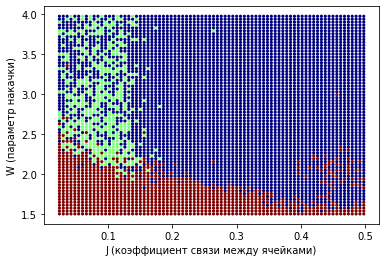

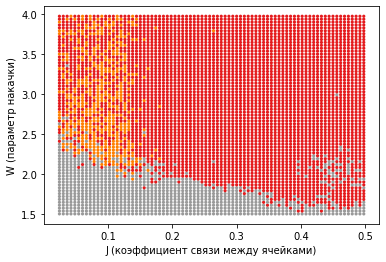

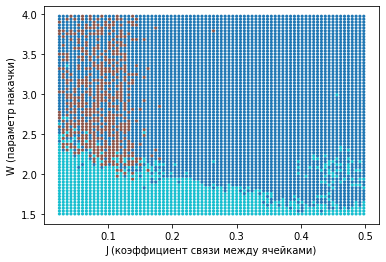

xyz4010_lessfinished
xyz4025_less
[1 1 1 ... 0 0 0]


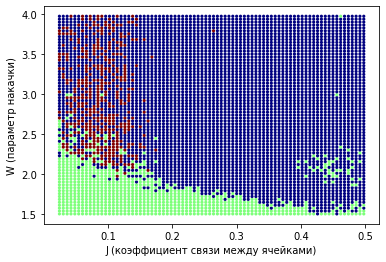

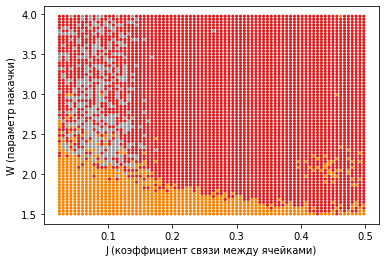

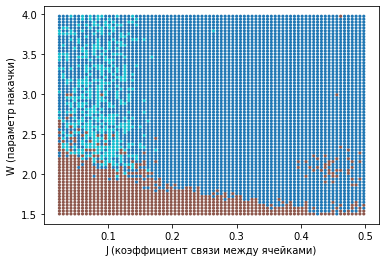

xyz4025_lessfinished
xyz405_less
[2 2 2 ... 0 0 0]


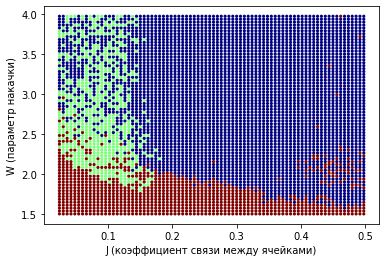

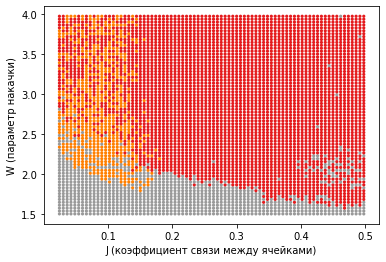

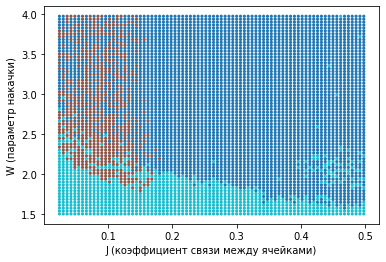

xyz405_lessfinished


In [0]:
X = []
for ii in range (cntwj1):
	X.append(snx10[ii] + sny10[ii] + snz10[ii])
X = np.array(X)
# gen_with_pca(10, 200, 70, 1000, 500, 'xyz', X)
# gen_with_pca(25, 200, 70, 1000, 500, 'xyz', X)
# gen_with_pca(3, 200, 70, 1000, 500, 'xyz', X)
gen_with_pca(10, 80, 70, 1000, 500, 'xyz40', X)
gen_with_pca(25, 80, 70, 1000, 500, 'xyz40', X)
gen_with_pca(5, 80, 70, 1000, 500, 'xyz40', X)

# X = []
# for ii in range (cntwj1):
# 	X.append(snz10[ii])
# X = np.array(X)
# gen_with_pca(10, 200, 70, 1000, 500, 'z', X)
# gen_with_pca(50, 200, 70, 1000, 500, 'z', X)

# X = []
# for ii in range (cntwj1):
# 	X.append(snx10[ii] + sny10[ii])
# X = np.array(X)
# gen_with_pca(10, 200, 70, 1000, 500, 'xy', X)
# gen_with_pca(50, 200, 70, 1000, 500, 'xy', X)

# X = []
# for ii in range (cntwj1):
# 	X.append(snx10[ii])
# X = np.array(X)
# gen_with_pca(10, 200, 70, 1000, 500, 'x', X)
# gen_with_pca(50, 200, 70, 1000, 500, 'x', X)


In [0]:
gen_with_pca(10, 160, 50, 1000, 500, 'xyz', X)
gen_with_pca(25, 160, 50, 1000, 500, 'xyz', X)

gen_with_pca(5, 160, 50, 1000, 500, 'xyz', X)

# gen_with_pca(25, 80, 70, 1000, 500, 'xyz', X)
# gen_with_pca(5, 80, 70, 1000, 500, 'xyz', X)

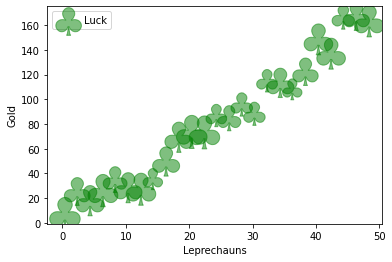

In [0]:
x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("Leprechauns")

plt.ylabel("Gold")
plt.legend(loc='upper left')
plt.show()

Как для кусочков:

In [0]:
def aggl(indicies, name):
  X = zData[indicies]
  j = jData[indicies]
  w = wData[indicies]

  for linkage in ['ward', 'average', 'complete', 'single']:
    if (linkage=='ward'):
        agf(name + linkage + '.png', j, w, X, linkage, 6)
    else:
      for affinity in ['euclidean', 'manhattan', 'cosine']:
        agf(name + linkage + '_' + affinity + '.png', j, w, X, linkage, 6, affinity)


def agf (name, jData, wData, X, linkage, n_cl, affinity='euclidean'):
	label = getlabels (X, linkage, n_cl, affinity)
	plt.scatter(jData, wData, s=5,  c=label, 
		edgecolor='none',
		cmap=plt.cm.nipy_spectral)
	plt.savefig(pictureDir  + name)
	plt.close()
 

def getlabels (X, linkage, n_cl, affinity='euclidean'):
  aggl = AgglomerativeClustering(n_clusters=n_cl, linkage=linkage, affinity=affinity)
  aggl.fit(X)
  label = aggl.labels_
  return label

def plot_data_and_labels(jData, wData, label):
  plt.scatter(jData, wData, s=5,  c=label, 
		edgecolor='none',
		cmap=plt.cm.nipy_spectral)

def mergelabels(indicies1, label1, indicies2, wmin, wmax, jmin, jmax, linkage, n_cl, affinity='euclidean',
                indicies3=[], label3=[]):
  # print(indicies1, label1, indicies2, wmin, wmax, jmin, jmax, linkage, n_cl, affinity,
  #               indicies3, label3)
  X1 = zData[indicies1]
  # print(indicies2)
  X2 = zData[indicies2]


  # label1 = getlabels (X1, linkage, n_cl, affinity)
  label2 = getlabels (X2, linkage, n_cl, affinity)
  label2_new = recollor(indicies1, indicies2, label1, label2,  indicies3, label3)

  # plot_data_and_labels(jData[indicies1], wData[indicies1], label1)
  plot_data_and_labels(jData[indicies2], wData[indicies2], label2_new)
  return label2_new



w = 0 .. 4
j = 0 .. 2.5


In [0]:
def count_color_map(ind1, ind2, label1, label2):
  i1 = 0
  i2 = 0
  colorCnt = np.zeros((3, 3))
  while (i1 < len(ind1) and i2 < len(ind2)):
    if (ind1[i1] == ind2[i2]):
      colorCnt[label1[i1]][label2[i2]]+=1
      i1+=1
      i2+=1
    elif (ind1[i1] < ind2[i2]):
      i1 += 1
    else:
      i2 += 1
  return colorCnt

def recollor(ind1, ind2, label1, label2, ind3, label3):
  #1 -- left, 3 -- down, 2 -- want to recollor
  colorCnt1 = count_color_map(ind3, ind2, label3, label2)
  colorCnt3 = count_color_map(ind1, ind2, label1, label2)
  new_label = []
  # print(np.max(colorCnt1))
  # print(np.max(colorCnt3))
  if (np.max(colorCnt1) > np.max(colorCnt3)):
    colorMap = getcolors(colorCnt1)
  else:
    colorMap = getcolors(colorCnt3)
  for (prevc) in label2:
      new_label.append(colorMap[prevc])
  return new_label

def getcolors(ccnt):
  newcolors = [-1, -1, -1]
  # print(ccnt)
  used = set()
  #по хорошему нужно начинать с максимума
  for i in range(3):
    nn = np.argmax(ccnt)
    newc = nn % 3
    oldc = nn // 3
    if ((oldc not in used) and (newcolors[newc]==-1)):
      newcolors[newc] = oldc
      for j in range(3):
        ccnt[oldc][j] = 0
        ccnt[j][newc] = 0
      used.add(oldc)
  for i in range(3):
    if (newcolors[i]==-1):
      for j in range(3):
        if (j not in used):
          newcolors[i] = j
          used.add(j)
          break
  # print(newcolors)
  return newcolors


In [0]:
for (link, dist) in types:
  prevfiled = [([], []), ([],[]), ([],[]),  ([], []), ([], []),  ([], []),  ([], []),  ([], []),  ([], [])]
  for jmin in np.arange (0, 2.5, 0.5):
    newfield = []
    # print("len = ", len(prevfiled))
    for wmin in np.arange(0, 4, 0.5):
      ii = int(wmin / 0.5)
      ind = read_data(jmin, jmin + 1, wmin, wmin + 1)
      # print("ii = ", ii)
      (underI, underL) = prevfiled[ii][0], prevfiled[ii][1]

      new_labels =  []
      if (wmin == 0):
        new_labels = mergelabels(prevfiled[0][0], prevfiled[0][1],
                             ind, wmin, wmin + 1, jmin, jmin + 1, link, 3, dist, underI, underL)
      else:
        (pi, pl) = newfield[-1]
        if (underI==[]):
          new_labels = mergelabels(pi, pl, ind, wmin, wmin + 1, jmin, jmin + 1,  link, 3, dist, pi, pl)
        else:
          new_labels = mergelabels(pi, pl, ind, wmin, wmin + 1, jmin, jmin + 1,  link, 3, dist, underI, underL)
      newfield.append((ind, new_labels))
    prevfiled = newfield
  plt.savefig(root + "Phase_diagram_" + link + "_" + dist +".png")
  plt.show()